In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples = 1000 ,n_features = 2, centers =5 , random_state =3)

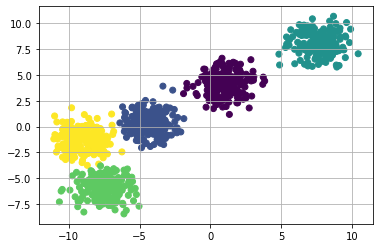

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [4]:
k =4
# 1 ) To initialise custom centers randomly

colors = ['green','blue','red','yellow','gray']
clusters = {}
for each_cluster in range (k):
    center = 10*(2*np.random.random((x.shape[1],)) -1 )
    points = []
    cluster ={
        'center' : center ,
        'points' : points ,
        'color' : colors[each_cluster],
    }
    clusters[each_cluster] = cluster
     

In [5]:
clusters


{0: {'center': array([-4.66195135, -4.03670511]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-5.93494535, -8.72436687]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([ 0.72129184, -7.23316902]),
  'points': [],
  'color': 'red'},
 3: {'center': array([-2.85638965, -6.16330573]),
  'points': [],
  'color': 'yellow'}}

In [6]:
def distance (v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [7]:
# Assigning every data point to one of the clusters 
# Expectation Step of the Algorithm , also known as Expectation Maximisation Algorithm

def assign_points(clusters): #E-step 

    for ix in range(x.shape[0]):
        
        dist = []
        for kx in range(k):
            d = distance(x[ix], clusters[kx]['center'])
            dist.append(d)
            
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(x[ix])

In [8]:
# Maximisation Step  , Step 3
# Update your cluster center by taking mean

def updateclusters(clusters): #M-Step -> We update every cluster center according to the mean of the points
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # if cluster has some non-zero points
            new_mean = pts.mean(axis=0)
            clusters[kx]['center'] = new_mean
            #clear my points list 
            clusters[kx]['points'] = []
                

In [9]:
def plotcluster(clusters) :
    for kx in range (k):
         pts =np.array(clusters[kx]['points'])
         if pts.shape[0] > 0:
                plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['color'])
         plt.scatter(clusters[kx]['center'][0],clusters[kx]['center'][1],color ='black',marker ='*')
        

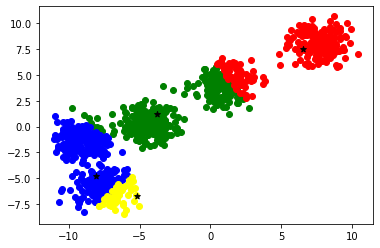

In [12]:
assign_points(clusters)
plotcluster(clusters)
updateclusters(clusters)